# Customer churn

Customers began to leave Beta-Bank. Every month. A little, but noticeable. Banking marketers figured it was cheaper to keep current customers than to attract new ones.

It is necessary to predict whether the client will leave the bank in the near future or not. You are provided with historical data on customer behavior and termination of agreements with the bank.

Build a model with an extremely large F1-measure. To pass the project successfully, you need to bring the metric to 0.59. Check the F1-measure on the test set yourself.

Additionally, measure the AUC-ROC, compare its value with the F1-measure.

Data source: https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling

## Data preparation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import shuffle
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [2]:
df = pd.read_csv('/Users/vasily/Learning/Data Science/Projects/Churn.csv')
print(df.sample(n=10, random_state=12345))
print(df.info())

      RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
7867       7868    15697201      Yocum          640     Spain  Female   46   
1402       1403    15613282  Vorobyova          757    France    Male   29   
8606       8607    15694581   Rawlings          807     Spain    Male   42   
8885       8886    15815125    Michael          668     Spain    Male   45   
6494       6495    15752846      Pinto          699    France    Male   28   
9628       9629    15596624       Topp          662    France  Female   22   
7459       7460    15583724    Raymond          645     Spain  Female   29   
3964       3965    15714981  Sabbatini          476    France    Male   37   
7000       7001    15739548    Johnson          775    France    Male   28   
4470       4471    15593795     Linton          516   Germany  Female   53   

      Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
7867     3.0       0.00              1          1               1   
140

In [3]:
#Remove unnecessary features and apply OHE to column Gender
df = df.drop(['RowNumber','CustomerId','Surname'], axis=1)
df = pd.get_dummies(df, drop_first=True)
#Set 0 instead of None in Tenure
df['Tenure'] = df['Tenure'].fillna(0)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        10000 non-null  int64  
 1   Age                10000 non-null  int64  
 2   Tenure             10000 non-null  float64
 3   Balance            10000 non-null  float64
 4   NumOfProducts      10000 non-null  int64  
 5   HasCrCard          10000 non-null  int64  
 6   IsActiveMember     10000 non-null  int64  
 7   EstimatedSalary    10000 non-null  float64
 8   Exited             10000 non-null  int64  
 9   Geography_Germany  10000 non-null  uint8  
 10  Geography_Spain    10000 non-null  uint8  
 11  Gender_Male        10000 non-null  uint8  
dtypes: float64(3), int64(6), uint8(3)
memory usage: 732.5 KB
None


In [4]:
#Splitting set into train, validation and test in proportion 60:20:20

features = df.drop(['Exited'], axis=1)
target = df['Exited']

features_train, features_valid, target_train, target_valid = train_test_split(features, target, 
                                                                              test_size=0.4, random_state=1234)
features_valid, features_test, target_valid, target_test = train_test_split(features_valid, target_valid,
                                                                            test_size=0.5, random_state=1234)
print(features_train.shape, target_train.shape)
print(features_valid.shape, target_valid.shape)
print(features_test.shape, target_valid.shape)

(6000, 11) (6000,)
(2000, 11) (2000,)
(2000, 11) (2000,)


**Conclusion**

We removed the columns that are not needed for training: 'RowNumber', 'CustomerId', 'Surname' and converted the categorical feature (Sex) to a numeric one, and also filled in the gaps in Tenure with zeros.

## Problem study

In [5]:
#Checking number of records with exited=1 in the train dataset
print(target_train[target_train==1].count())

1222


In [6]:
#Training the logistic regression model without considering class imbalances
model = LogisticRegression(random_state=123, solver='liblinear')
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)
print("F1 of linear regression without considering class imbalances =", f1_score(target_valid, predicted_valid))

F1 of linear regression without considering class imbalances = 0.02564102564102564


In [7]:
#Training random forest model without considering class imbalances
for depth in range(1, 15):
    model = RandomForestClassifier(n_estimators=10, max_depth=depth, random_state=123)
    model.fit(features_train, target_train)
    predicted_valid = model.predict(features_valid)
    print(f"With max depth = {depth}, F1 = {f1_score(target_valid, predicted_valid)}")
print()  
for n in range (10, 110, 10):
    model = RandomForestClassifier(n_estimators=n, max_depth=11, random_state=123)
    model.fit(features_train, target_train)
    predicted_valid = model.predict(features_valid)
    print(f"With tree qty = {n} and max depth = 12, F1 = {f1_score(target_valid, predicted_valid)}")

With max depth = 1, F1 = 0.0
With max depth = 2, F1 = 0.12468827930174564
With max depth = 3, F1 = 0.23201856148491878
With max depth = 4, F1 = 0.47584973166368516
With max depth = 5, F1 = 0.5000000000000001
With max depth = 6, F1 = 0.4852941176470588
With max depth = 7, F1 = 0.5333333333333333
With max depth = 8, F1 = 0.537261698440208
With max depth = 9, F1 = 0.5255972696245733
With max depth = 10, F1 = 0.5420240137221269
With max depth = 11, F1 = 0.5397350993377483
With max depth = 12, F1 = 0.5606557377049181
With max depth = 13, F1 = 0.5540983606557377
With max depth = 14, F1 = 0.5380875202593194

With tree qty = 10 and max depth = 12, F1 = 0.5397350993377483
With tree qty = 20 and max depth = 12, F1 = 0.5503355704697986
With tree qty = 30 and max depth = 12, F1 = 0.5482233502538071
With tree qty = 40 and max depth = 12, F1 = 0.5457627118644067
With tree qty = 50 and max depth = 12, F1 = 0.5589225589225589
With tree qty = 60 and max depth = 12, F1 = 0.5516074450084603
With tree qty

**Conclusion**

The number of records with the target feature = 1 in the training sample is 20% of the total number, that is, the sample is highly unbalanced.
With an unbalanced classification, the maximum value of the metric F1 = 0.56 on the test sample was achieved using the random forest model.
Linear regression gave F1 close to zero.

## Struggling with imbalance

### Class weighting

In [8]:
#Function for drawing the ROC curve and calculating ROC_AUC
def roc(model):
    probabilities_valid = model.predict_proba(features_valid)
    probabilities_one_valid = probabilities_valid[:,1]
    fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)
    plt.figure(figsize=(6,6))
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.plot(fpr, tpr)
    plt.ylim([0.0, 1.0])
    plt.xlim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC-curve')
    plt.show()
    
    print("AUC-ROC = ", roc_auc_score(target_valid, probabilities_one_valid))

F1 of linear regression with balanced classes = 0.4233333333333333


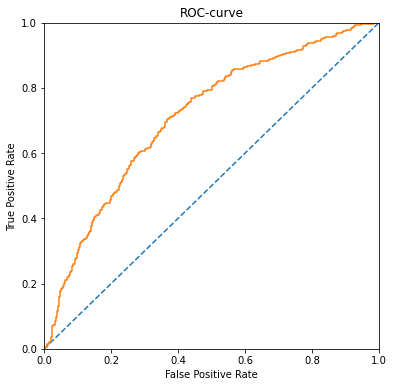

AUC-ROC =  0.7096461979876323
F1 of random forest with balanced classes = 0.5751824817518248


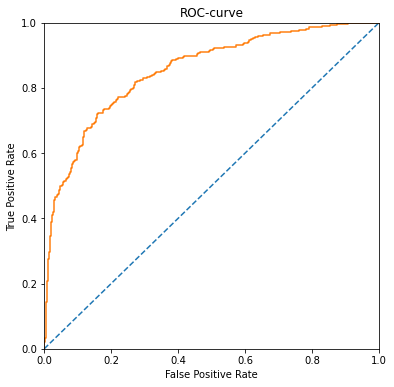

AUC-ROC =  0.8532124515249975


In [9]:
# Apply class weighting in models

model = LogisticRegression(random_state=123, solver='liblinear', class_weight = 'balanced')
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)
print("F1 of linear regression with balanced classes =", f1_score(target_valid, predicted_valid))
roc(model)

model = RandomForestClassifier(n_estimators=90, max_depth=12, random_state=123, class_weight='balanced')
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)
print("F1 of random forest with balanced classes =", f1_score(target_valid, predicted_valid))
roc(model)

### Upsampling and Downsampling

In [10]:
# Function for Up- and Downsampling of train dataset

def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]
    features_upsampled = pd.concat([features_zeros] + [features_ones]*repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones]*repeat)
    
    features_upsampled, target_upsampled = shuffle(features_upsampled, target_upsampled, random_state=123)
    
    return features_upsampled, target_upsampled

def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]
    
    features_downsampled = pd.concat([features_zeros.sample(frac=fraction, random_state=123)] + [features_ones])
    target_downsampled = pd.concat([target_zeros.sample(frac=fraction, random_state=123)] + [target_ones])
    
    return features_downsampled, target_downsampled

F1 of random forest model with upsampling = 0.5889884763124199


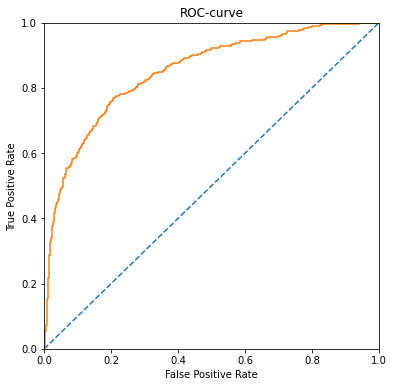

AUC-ROC =  0.8509393669426684


In [11]:
# Train a random forest model by applying upsampling to align records with target = 1 and 0

features_upsampled, target_upsampled = upsample(features_train, target_train, 4)

model_ups = RandomForestClassifier(n_estimators=90, max_depth=12, random_state=123)
model_ups.fit(features_upsampled, target_upsampled)
predictions_valid = model_ups.predict(features_valid)
print("F1 of random forest model with upsampling =", f1_score(target_valid, predictions_valid))
roc(model_ups)

F1 of random forest model with downsampling = 0.5617283950617283


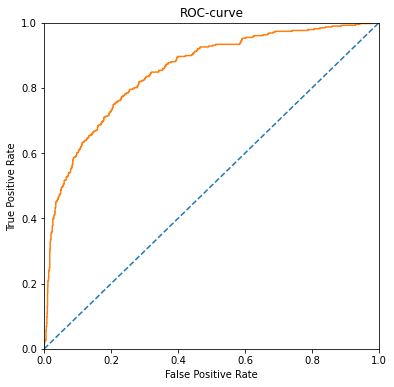

AUC-ROC =  0.8510056925374699


In [12]:
# Train random forest model by applying downsampling to flatten records with target = 1 and 0

features_downsampled, target_downsampled = downsample(features_train, target_train, 0.26)

model_dwn = RandomForestClassifier(n_estimators=90, max_depth=12, random_state=123)
model_dwn.fit(features_downsampled, target_downsampled)
predictions_valid = model_dwn.predict(features_valid)
print("F1 of random forest model with downsampling =", f1_score(target_valid, predictions_valid))
roc(model_dwn)

F1 of random forest model with up+downsampling = 0.5977272727272727


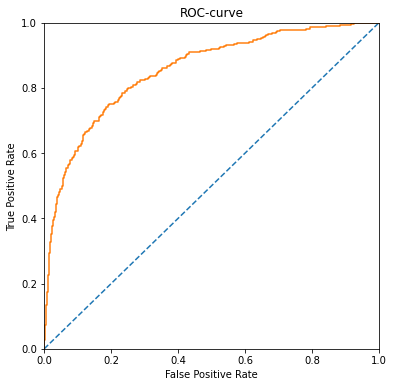

AUC-ROC =  0.8536022167487683


In [13]:
#Train random forest model with up- and downsampling 

features_downsampled, target_downsampled = downsample(features_train, target_train, 0.5)
features_updownsampled, target_updownsampled = upsample(features_downsampled, target_downsampled, 2)

model_up_down = RandomForestClassifier(n_estimators=90, max_depth=12, random_state=123)
model_up_down.fit(features_updownsampled, target_updownsampled)
predictions_valid = model_up_down.predict(features_valid)
print("F1 of random forest model with up+downsampling =", f1_score(target_valid, predictions_valid))
roc(model_up_down)

**Conclusion**

The best quality of the model (highest F1) was achieved at the random forest level when using **upsampling and up+downsampling**. When upsampling, **F1 = 0.59 validation set**. With upsampling and downsampling, F1 = 0.60, however, on the test set, it turns out to be a slightly insignificant value than the model trained on upsampled data.
The area under the ROC curve for all random forest models with the class imbalance strategy is approximately the same: **~0.85**.

## Model testing

In [14]:
predictions_test = model_ups.predict(features_test)
print("F1 on test set =", f1_score(target_test, predictions_test))

F1 on test set = 0.6153846153846153
